In [1]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import math
import warnings as wr
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
house_train = pd.read_csv("trainhouse.csv")
house_test = pd.read_csv('testhouse.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train.shape

(1460, 81)

In [4]:
#droping SalePrice column
Sale_Price=house_train.iloc[:,80]
train=house_train.drop(["SalePrice"],axis=1)
train.head()
test = house_test

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data= pd.concat([train,test], keys=['x', 'y'])
data=data.drop(["Id"],axis=1)
percentage=(train.isnull().sum()*100/train.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([percentage], axis=1, keys=['Percentage'])

In [7]:
missing_data.head(22)

,Percentage
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageQual,5.547945
GarageCond,5.547945


In [8]:
data = data.drop((missing_data[missing_data["Percentage"] > 0.05]).index,1)
(data.isnull().sum()).sort_values()

MSSubClass       0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HeatingQC        0
Foundation       0
Heating          0
SaleCondition    0
BldgType         0
ExterCond        0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
Condition1       0
Neighborhood     0
YearRemodAdd     0
RoofMatl         0
LandSlope        0
LotConfig        0
ExterQual        0
LandContour      0
LotShape         0
Street           0
LotArea          0
RoofStyle        0
Condition2       0
GarageArea       1
BsmtFinSF1       1
Exterior1st      1
Exterior2nd      1
SaleType         1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2  

In [9]:
for column_name in data.columns[:]:
    print("{} wrong variable : ".format(column_name))
    wrong_variable = []
    for i in data[column_name]:
        try:
            float(i)
        except:
            wrong_variable.append(i)
    print(set(wrong_variable))


MSSubClass wrong variable : 
set()
MSZoning wrong variable : 
{'C (all)', 'RL', 'RM', 'FV', 'RH'}
LotArea wrong variable : 
set()
Street wrong variable : 
{'Grvl', 'Pave'}
LotShape wrong variable : 
{'IR3', 'IR2', 'Reg', 'IR1'}
LandContour wrong variable : 
{'Low', 'Bnk', 'HLS', 'Lvl'}
Utilities wrong variable : 
{'AllPub', 'NoSeWa'}
LotConfig wrong variable : 
{'CulDSac', 'Corner', 'FR2', 'Inside', 'FR3'}
LandSlope wrong variable : 
{'Sev', 'Gtl', 'Mod'}
Neighborhood wrong variable : 
{'NWAmes', 'Edwards', 'StoneBr', 'NoRidge', 'Blmngtn', 'OldTown', 'SawyerW', 'ClearCr', 'Blueste', 'NridgHt', 'Veenker', 'Somerst', 'Sawyer', 'CollgCr', 'NPkVill', 'MeadowV', 'Mitchel', 'BrkSide', 'Gilbert', 'Timber', 'Crawfor', 'BrDale', 'NAmes', 'IDOTRR', 'SWISU'}
Condition1 wrong variable : 
{'RRNe', 'PosN', 'Norm', 'RRAe', 'Feedr', 'PosA', 'RRAn', 'Artery', 'RRNn'}
Condition2 wrong variable : 
{'Norm', 'PosN', 'RRAe', 'Feedr', 'PosA', 'RRAn', 'Artery', 'RRNn'}
BldgType wrong variable : 
{'2fmCon', 'T

### We got rid of most of the columns with a lot of null values.

In [10]:
# finding numeric column from data
num_col=data._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
# finding catogorical features
cat_col=set(data.columns)-set(num_col)
cat_col

{'BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Functional',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [12]:
# filling numrical missing value using fillna
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)
# filling catgorical missing value
for col in cat_col:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [13]:
data.shape

(2919, 60)

In [14]:
for i in cat_col:
    print(data[i].value_counts())

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64
Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
Y    2723
N     196
Name: CentralAir, dtype: int64
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64
WD       2526
New       239
COD        87
ConLD      26
CWD      

In [15]:
#droping some unnecessary cat_features bcoz they have 80% + same value and 20% - defertnt values so they can't effect score
df=data.drop(["RoofMatl","Heating","Condition2","SaleType",
                "CentralAir","Functional","LandSlope","ExterCond","Condition1",
               "GarageArea","BsmtUnfSF","3SsnPorch","MiscVal"],axis=1)

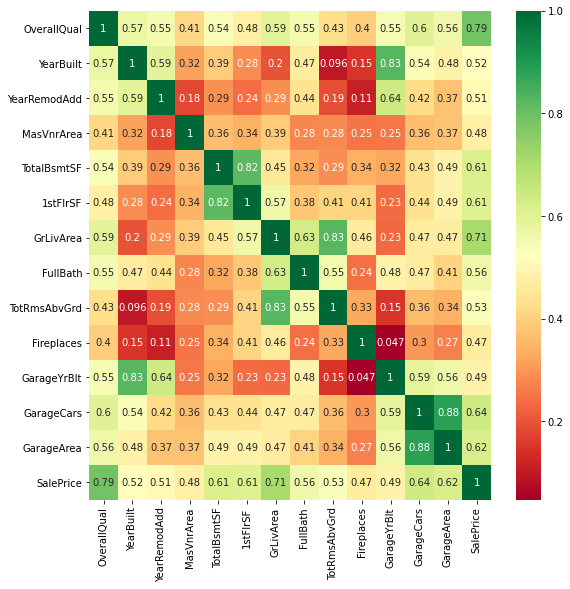

In [16]:
corrmat = house_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.4]
plt.figure(figsize=(9,9))
g = sns.heatmap(house_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

With the heat map, we see the columns most affected by the SalePrice variable.

In [17]:
var = house_train[house_train.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)
var

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [18]:
##droping low version feature
df=df.drop(["BldgType","Exterior1st","Exterior2nd","Foundation","YrSold","SaleCondition","RoofStyle"],axis=1)

In [19]:
df.shape

(2919, 40)

In [20]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,441.423235,49.582248,1051.777587,1159.581706,...,1.044536,6.451524,0.597122,1.766621,93.709832,47.486811,23.098321,16.062350,2.251799,6.213087
std,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,455.532750,169.176615,440.690726,392.362079,...,0.214462,1.569379,0.646129,0.761494,126.526589,67.575493,64.244246,56.184365,35.663946,2.714762
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,793.000000,876.000000,...,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,369.000000,0.000000,990.000000,1082.000000,...,1.000000,6.000000,1.000000,2.000000,0.000000,26.000000,0.000000,0.000000,0.000000,6.000000
75%,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,733.000000,0.000000,1302.000000,1387.500000,...,1.000000,7.000000,1.000000,2.000000,168.000000,70.000000,0.000000,0.000000,0.000000,8.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1526.000000,6110.000000,5095.000000,...,3.000000,15.000000,4.000000,5.000000,1424.000000,742.000000,1012.000000,576.000000,800.000000,12.000000


Looking forward to our columns, we found some variables which can have an high correlation with our main variable SalePrice:

    OverallQual
    GrLivArea
    GarageCars
    GarageArea

Skewness coeff. is: 1.882876
Kurtosis coeff. is: 6.536282


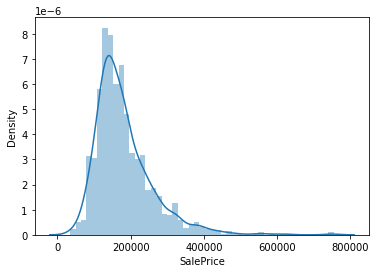

In [21]:
sns.distplot(house_train['SalePrice']);
print("Skewness coeff. is: %f" % house_train['SalePrice'].skew())
print("Kurtosis coeff. is: %f" % house_train['SalePrice'].kurt())

These measures of symmetry are useful in order to understand the symmetry of the distribution of our main variable. Our distribution is highly skewed and present a longer tail on the right. The high value of kurtosis can determine an higher probability of outliers values.



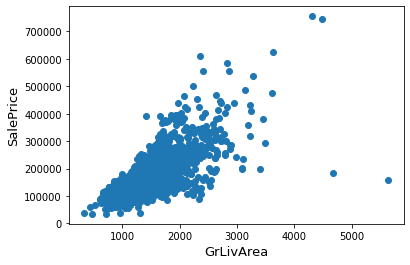

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = house_train['GrLivArea'], y = house_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

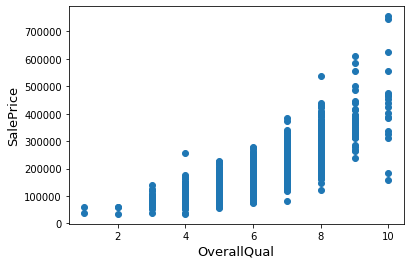

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = house_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

In [24]:
df.shape

(2919, 40)

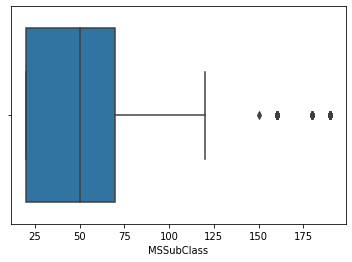

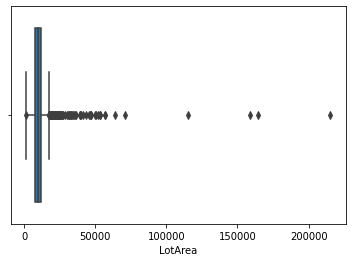

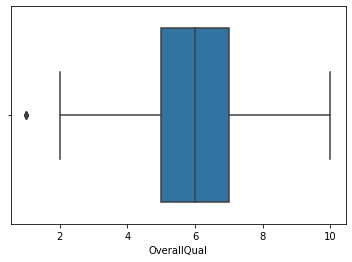

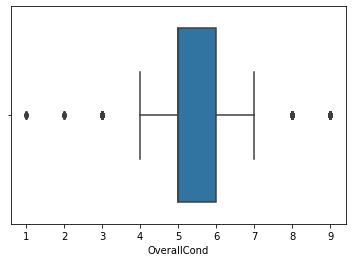

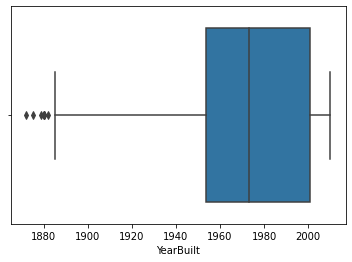

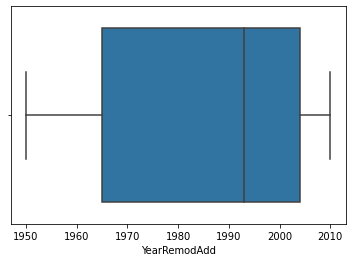

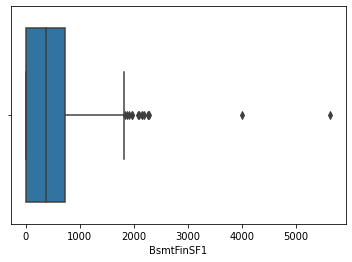

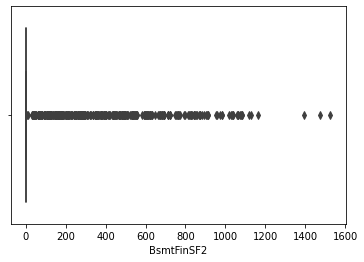

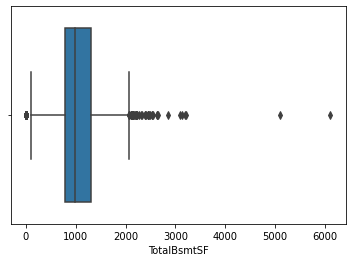

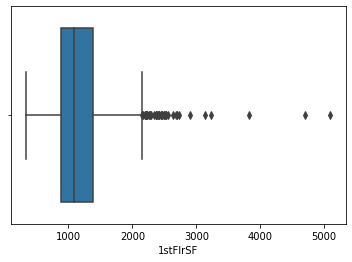

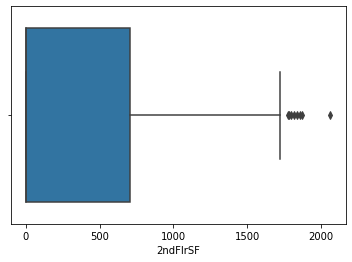

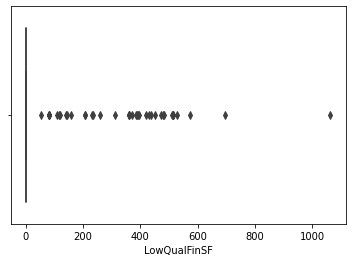

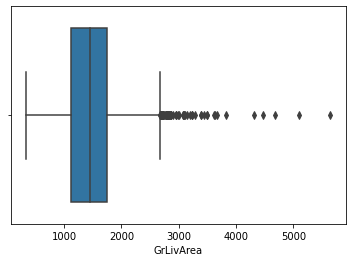

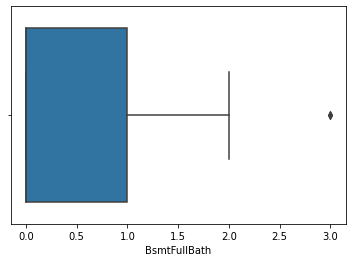

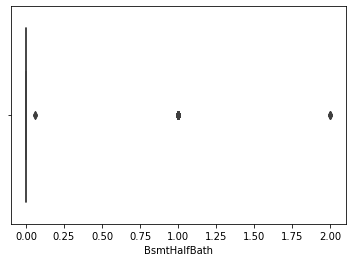

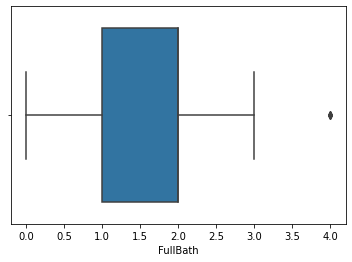

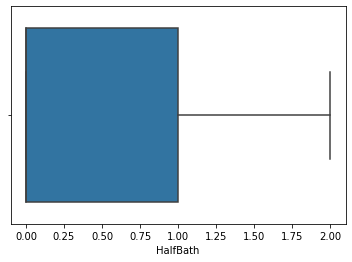

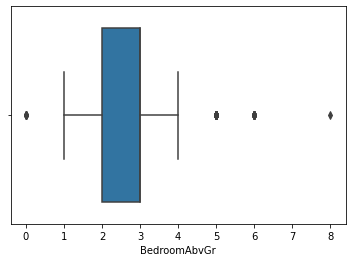

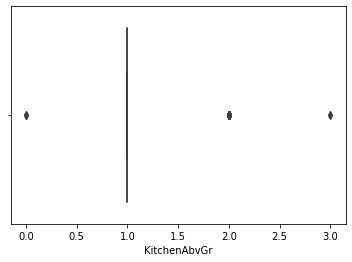

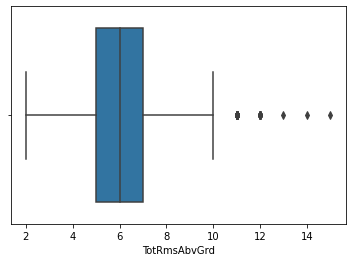

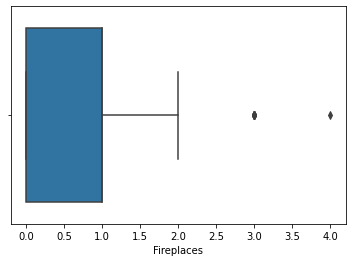

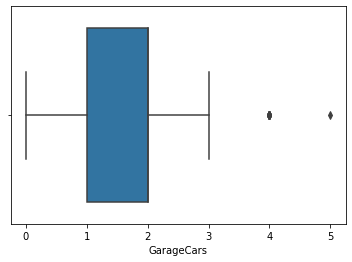

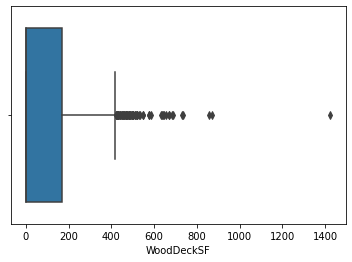

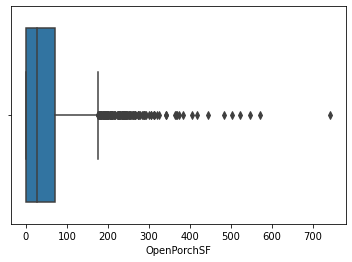

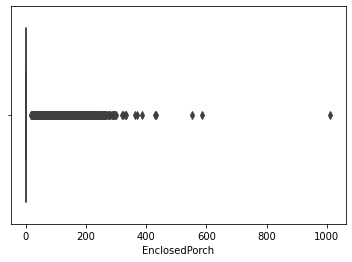

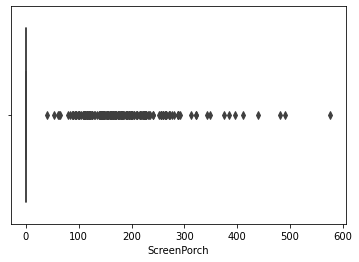

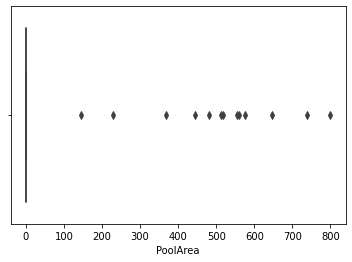

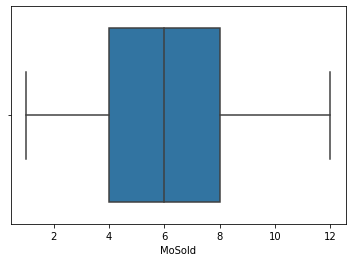

In [25]:
n_features = df.select_dtypes(exclude = ["object"]).columns
for i in df[n_features]:
    sns.boxplot(x=df[i])
    plt.show()

Here we subtract numerical variables, and plot graphs to get an idea of outliars.

In [26]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

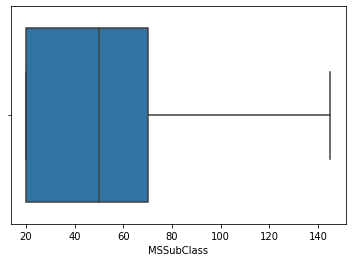

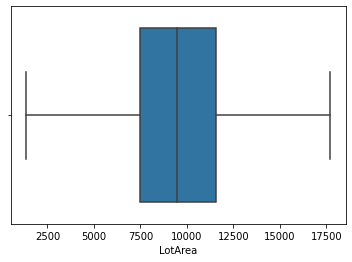

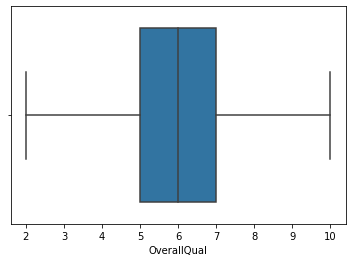

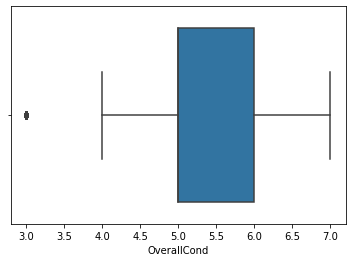

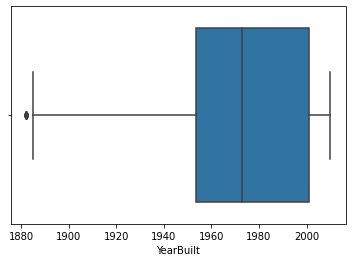

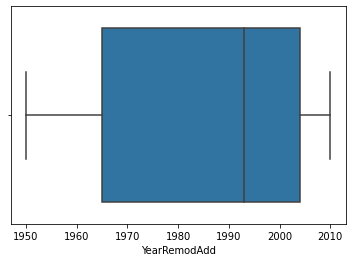

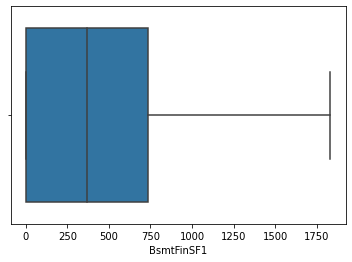

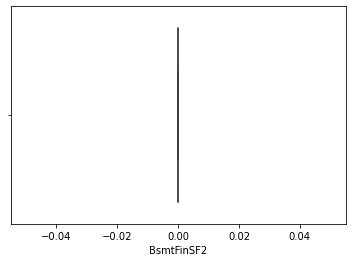

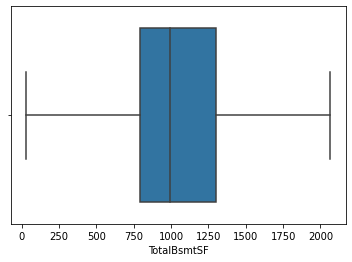

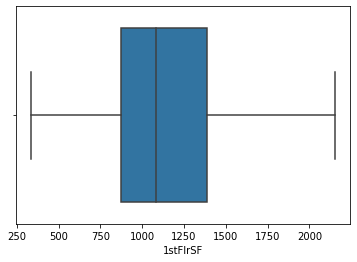

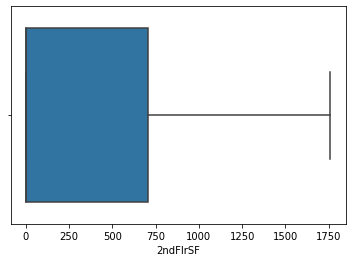

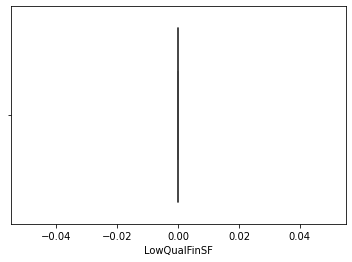

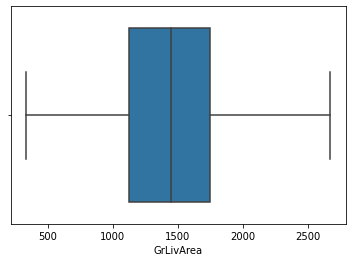

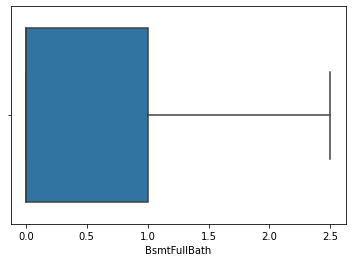

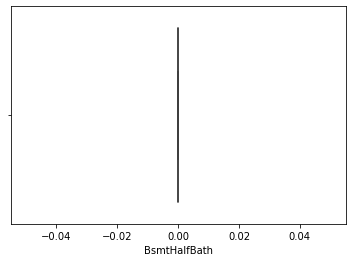

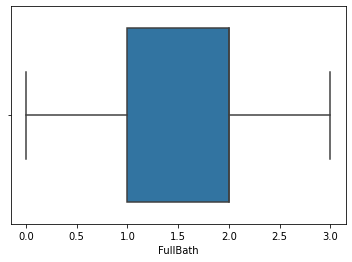

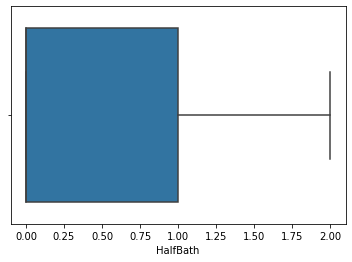

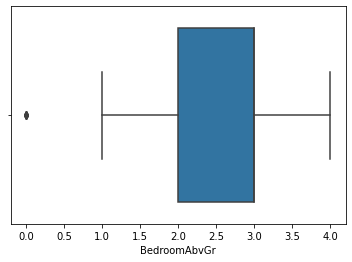

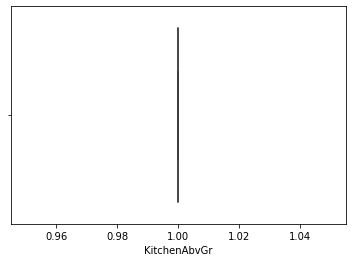

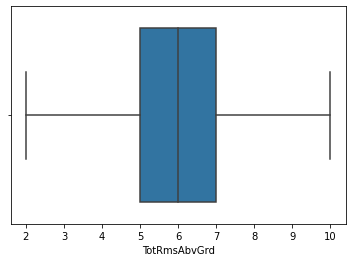

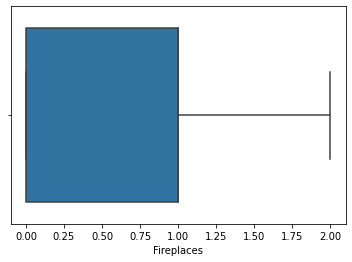

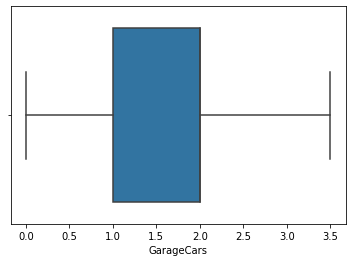

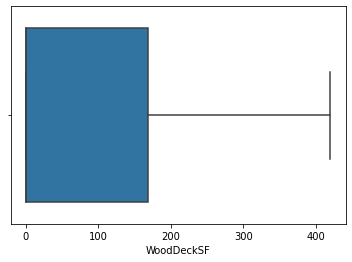

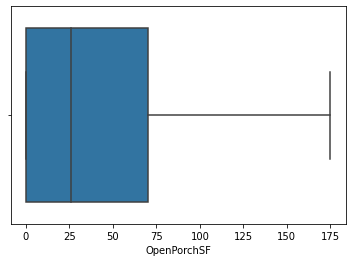

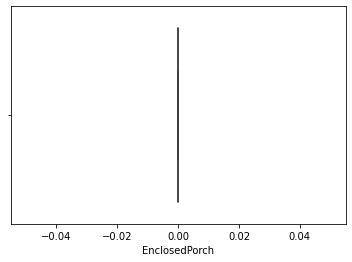

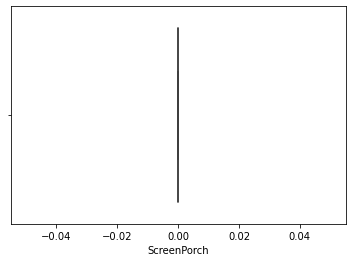

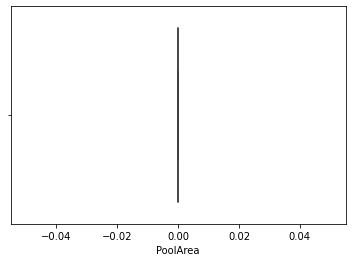

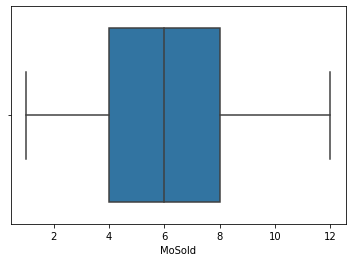

In [27]:
for i in df[n_features]:
    sns.boxplot(x=df[i])
    plt.show()

In [28]:
X=pd.get_dummies(df, drop_first=True)
X.shape

(2919, 87)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

Here we use minmaxscaler for scaling numeric fields

In [30]:
Train_data=X.loc["x"]
Train_data.shape

(1460, 87)

In [31]:
Test_data=X.loc["y"]
Test_data.shape

(1459, 87)

In [32]:
Train_data.insert(0,column="SalePrice",value=Sale_Price)
Train_data.head()

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,...,ExterQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_P,PavedDrive_Y
0,208500,0.32,0.434384,0.625,0.5,0.945312,0.883333,0.385266,0.0,0.405943,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,181500,0.00,0.504643,0.500,1.0,0.734375,0.433333,0.533697,0.0,0.605354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,223500,0.32,0.605450,0.625,0.5,0.929688,0.866667,0.265211,0.0,0.437377,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,140000,0.40,0.501588,0.625,0.5,0.257812,0.333333,0.117872,0.0,0.356827,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,250000,0.32,0.789345,0.750,0.5,0.921875,0.833333,0.357435,0.0,0.547888,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
x=Train_data.drop(["SalePrice"],axis=True)
y=Train_data["SalePrice"]

Here we split data in input(x) and output(y)

-------------------------------------------------------

## Model Building Using Train Data

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)
X_train=x_train
X_test=x_test

## LinearRegression

In [36]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

y_egitim_tahmini = lrm.predict(x_train)
y_test_tahmini = lrm.predict(x_test)

print("Eğitim kümesindeki gözlem sayısı  : {}".format(x_train.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")
print("Eğitim kümesindeki R-Kare değeri  : {}".format(lrm.score(x_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri(Score)  : {}".format(lrm.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesindeki gözlem sayısı  : 1022
Test kümesindeki gözlem sayısı    : 438 

Eğitim kümesindeki R-Kare değeri  : 0.8850006859658176
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri(Score)  : -3.199040438382897e+20
Ortalama Mutlak Hata (MAE)        : 77605964775283.66
Ortalama Kare Hata (MSE)          : 1.6656278188006707e+30
Kök Ortalama Kare Hata (RMSE)     : 1290592041971695.5
Ortalama Mutlak Yüzde Hata (MAPE) : 56562049085.839066


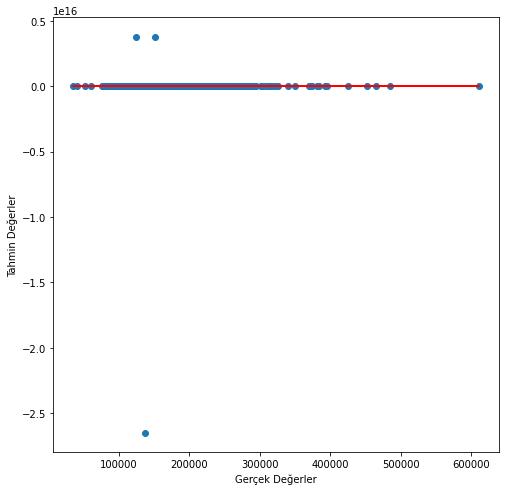

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_tahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## Ridge

In [38]:
ridgeregr = Ridge(alpha=10) 
ridgeregr.fit(x_train, y_train)

y_egitim_tahmini = ridgeregr.predict(x_train)
y_test_tahmini = ridgeregr.predict(x_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(x_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri(Score)  : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))


Eğitim kümesi R-Kare değeri       : 0.8701317908472115
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri(Score)  : 0.8711487772929423
Ortalama Mutlak Hata (MAE)        : 16987.639910405684
Ortalama Kare Hata (MSE)          : 670882988.699714
Kök Ortalama Kare Hata (RMSE)     : 25901.409009930598
Ortalama Mutlak Yüzde Hata (MAPE) : 9.860398456831536


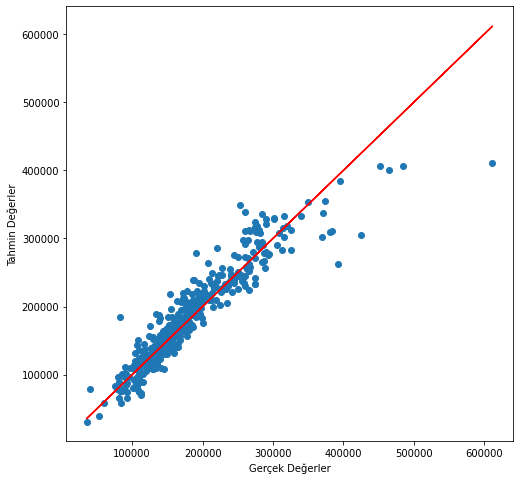

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_tahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## Lasso

In [40]:
lassoregr = Lasso(alpha=10) 
lassoregr.fit(X_train, y_train)

y_egitim_tahmini = lassoregr.predict(x_train)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri(Score)  : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8866397843581991
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri(Score)  : 0.8504040968626592
Ortalama Mutlak Hata (MAE)        : 18537.927646735574
Ortalama Kare Hata (MSE)          : 778893242.031415
Kök Ortalama Kare Hata (RMSE)     : 27908.658907790876
Ortalama Mutlak Yüzde Hata (MAPE) : 10.911779797370889


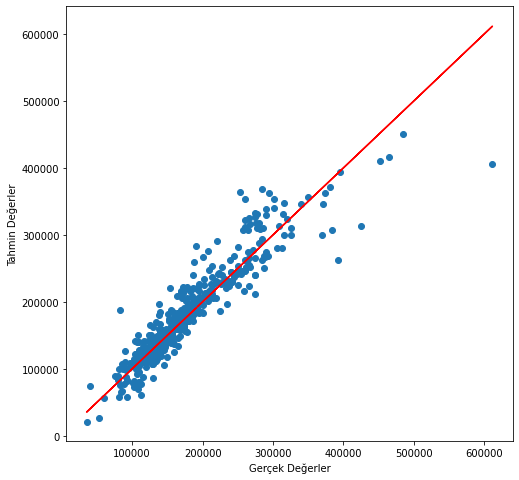

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_tahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## ElasticNet

In [42]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=0.05) 
elasticregr.fit(X_train, y_train)

y_egitim_tahmini = elasticregr.predict(X_train)
y_test_tahmini = elasticregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(elasticregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elasticregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.8509474455551873
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.8689003951318676
Ortalama Mutlak Hata (MAE)        : 17008.0135821185
Ortalama Kare Hata (MSE)          : 682589523.6651617
Kök Ortalama Kare Hata (RMSE)     : 26126.41429023818
Ortalama Mutlak Yüzde Hata (MAPE) : 9.731156693855466


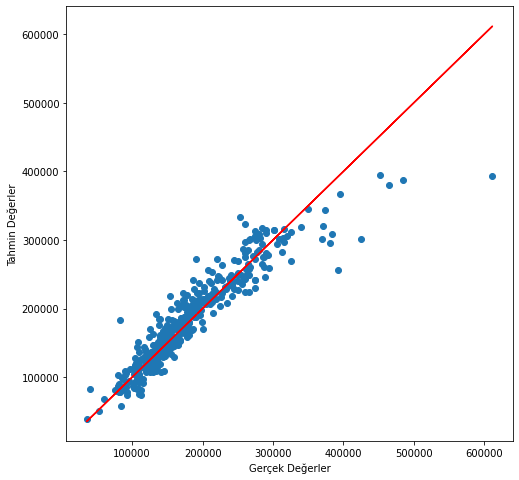

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_tahmini)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## SVM

In [44]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=1)
svr_reg.fit(X_train,y_train)
predictsv = svr_reg.predict(X_test)
print(svr_reg.score(x_test,y_test))
rmse = math.sqrt(mean_squared_error(y_test, predictsv))
print("RMSE: %.4f" % rmse)

-0.045522604664168353
RMSE: 73781.2199


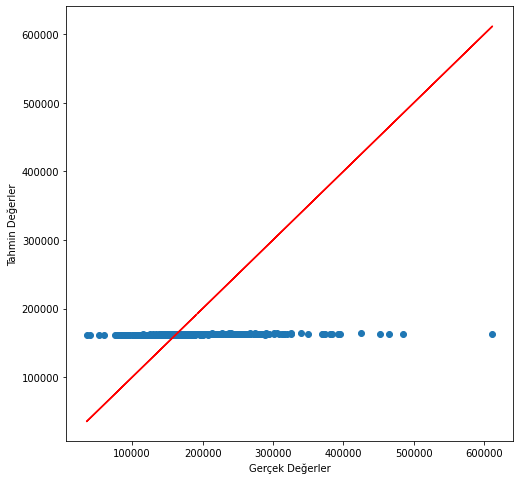

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictsv)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.metrics import mean_squared_error

rfr=RandomForestRegressor(n_estimators = 70,random_state=40,
                          min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001,min_samples_split=5)
rfr.fit(x_train,y_train)
y_predictrfr = rfr.predict(X_test)

#here we can check our model score
print(rfr.score(x_test,y_test))

rmse = math.sqrt(mean_squared_error(y_test, rfr.predict(x_test)))

print("mean squares error :",rmse)

0.881795714738071
mean squares error : 24808.227080074153


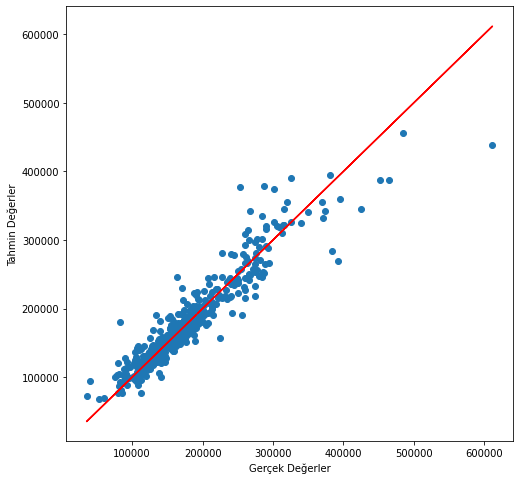

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_predictrfr)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=100,min_samples_split=5,min_impurity_decrease=0.002,min_weight_fraction_leaf=0.001)
dtr.fit(x_train,y_train)
y_predictdtr = dtr.predict(x_test)

#u can also use GridSearchCV / random Searchcv for hyperperameter tuning
print(dtr.score(x_test,y_test))
rmse = math.sqrt(mean_squared_error(y_test,y_predictdtr))
print("RMSE:",rmse)

0.7475023249972974
RMSE: 36258.33102650624


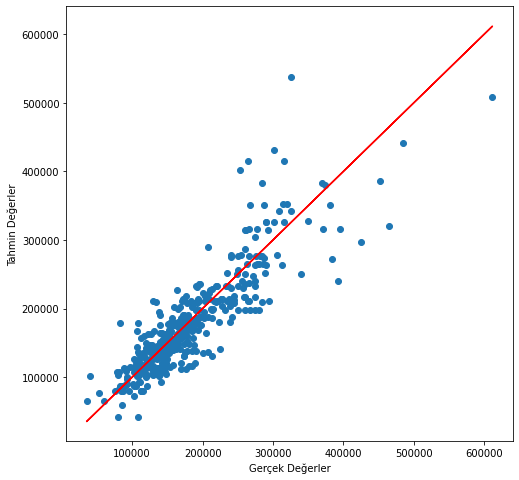

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_predictdtr)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

GBoost = GradientBoostingRegressor(n_estimators=550, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=19, min_samples_split=10, 
                                   loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(x_train, y_train)
y_predictGB = GBoost.predict(x_test)
print(GBoost.score(x_test,y_test))
rmse = math.sqrt(mean_squared_error(y_test, y_predictGB))
print("RMSE: %.4f" % rmse)

0.9243757374760967
RMSE: 19843.1079


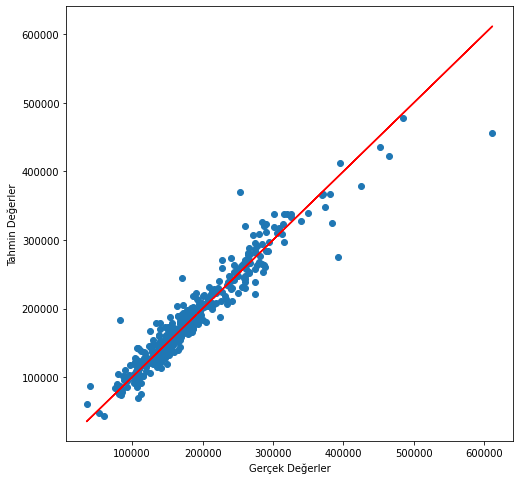

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_predictGB)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

## XGBRegressor

In [52]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor( learning_rate = 0.1,
                max_depth =4,objective="reg:linear",n_estimators=555)
xg_reg.fit(x_train,y_train)
xgbost= xg_reg.predict(x_test)
print(xg_reg.score(x_test,y_test))
rmse = math.sqrt(mean_squared_error(y_test, xgbost))
print("RMSE: %.4f" % rmse)

[21:09:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
0.8893303599275385
RMSE: 24004.5388


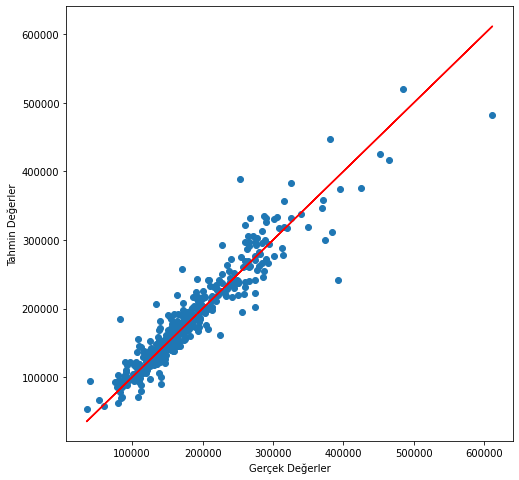

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, xgbost)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

# Best Option

In [54]:
y_predictGB = GBoost.predict(Test_data)

In [55]:
y_model_prerfc=np.around(y_predictGB,0)
prediction=np.array(y_model_prerfc).tolist()
Test_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,ExterQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_P,PavedDrive_Y
0,0.00,0.628177,0.375,0.75,0.617188,0.183333,0.255389,0.0,0.418713,0.308791,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.00,0.789773,0.500,0.75,0.593750,0.133333,0.503683,0.0,0.638261,0.546703,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.32,0.763074,0.375,0.50,0.898438,0.800000,0.431651,0.0,0.441306,0.326374,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.32,0.527737,0.500,0.75,0.906250,0.800000,0.328513,0.0,0.440324,0.325275,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.80,0.223913,0.750,0.50,0.859375,0.700000,0.143520,0.0,0.614194,0.519780,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
y_predictGB

array([122485.24656522, 166771.2742255 , 185833.0982606 , ...,
       176693.26950967, 121564.42350712, 229435.90949729])

In [57]:
test.insert(1,column="SalePrice",value=prediction)
test.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,122485.0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,166771.0,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,185833.0,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,194064.0,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,181521.0,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
predict_sub=test.drop(test.iloc[:,2:],axis=1)
predict_sub.head(20)

,Id,SalePrice
0,1461,122485.0
1,1462,166771.0
2,1463,185833.0
3,1464,194064.0
4,1465,181521.0
5,1466,186697.0
6,1467,175151.0
7,1468,172451.0
8,1469,189188.0
9,1470,122526.0


In [59]:
predict_sub.to_csv('Home_predictionsGB.csv',index=False)

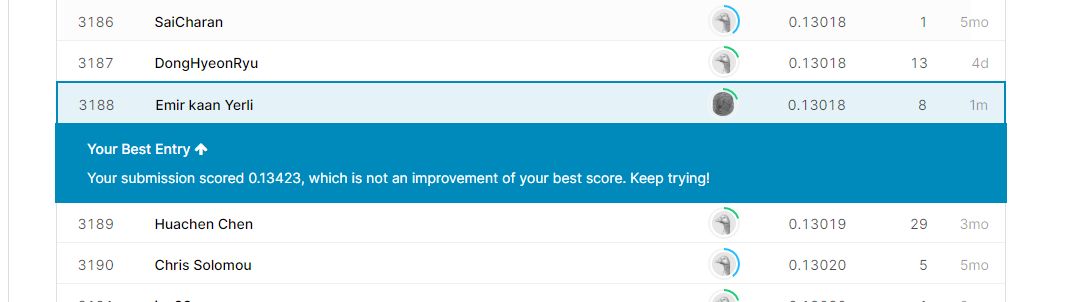